In [124]:
import numpy as np
import matplotlib.pyplot as plt
import torch

%matplotlib inline
plt.style.use("seaborn-whitegrid")

from tqdm.notebook import tqdm

In [125]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts

In [126]:
data = load_breast_cancer()
type(data)

sklearn.utils.Bunch

In [127]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [128]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [129]:
X_train, X_test, Y_train, Y_test = tts(data.data , data.target, test_size = .33)


Y_train = Y_train.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(381, 30) (188, 30)
(381, 1) (188, 1)


In [130]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [140]:
class LogisticReg:

  def __init__(self, dim):
    _linear = torch.nn.Linear(dim,1)
    _sigmoid = torch.nn.Sigmoid()
    # model
    self.model = torch.nn.Sequential(
        _linear,
        _sigmoid
    )

    # or model = _linear and loss = torch.nn.BCEWithLogitsLoss

    self.loss = torch.nn.BCELoss()
    self.epoch_loss = []

  
  def fit(self,input,target,learning_rate = 0.05, n_iter =1000):
    if not (type(input) == torch.Tensor or type(target) == torch.Tensor):
      RaiseValueError("expected tensor as input and output")

    optimizer = torch.optim.Adam(self.model.parameters(),lr=learning_rate)

    for _ in tqdm(range(n_iter)):

      optimizer.zero_grad()

      _out = self.model(input)
      _loss = self.loss(_out, target)

      self.epoch_loss.append(_loss.item())

      _loss.backward()
      optimizer.step()

  def validate_train_against_test(self,train_input,train_target,test_input,test_target,learning_rate = 0.01, n_iter =1000):
    if not (type(train_input) == torch.Tensor or type(test_input) == torch.Tensor):
      RaiseValueError("expected tensor as input and output")
    
    train_loss = []
    test_loss = []

    optimizer = torch.optim.Adam(self.model.parameters(),lr=learning_rate)

    for _ in tqdm(range(n_iter)):

      optimizer.zero_grad()

      _out = self.model(train_input)
      _loss = self.loss(_out, train_target)

      train_loss.append(_loss.item())
      
      # test data
      _test_out = self.model(test_input)
      _test_loss = self.loss(_test_out, test_target)

      test_loss.append(_test_loss.item())
      #--------------

      _loss.backward()
      optimizer.step()
  
    plt.close()
    plt.plot(train_loss,label="train-loss")
    plt.plot(test_loss,label="test-loss")
    plt.legend()
    plt.show()

  def plot_loss(self):
    plt.plot(self.epoch_loss)

  def predict(self,input):
    return self.model(input)
  
  def show_param(self):
    w = self.model.weight.data.numpy()
    b = self.model.bias.data.numpy()
    print("Weight:",w,"Bias:",b)

  def get_model(self):
    return self.model


In [132]:
X_train = X_train.astype(np.float32)
Y_train = Y_train.astype(np.float32)

X_train = torch.from_numpy(X_train)
Y_train = torch.from_numpy(Y_train)

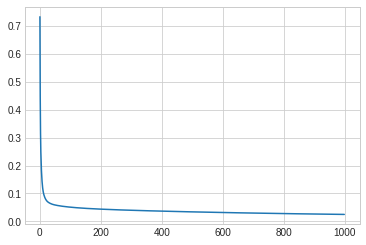

In [141]:
dim = X_train.shape[1]
lr = LogisticReg(dim)

lr.fit(X_train, Y_train)

lr.plot_loss()


In [134]:
X_test = X_test.astype(np.float32)
Y_test = Y_test.astype(np.float32)

X_test = torch.from_numpy(X_test)
Y_test = torch.from_numpy(Y_test)

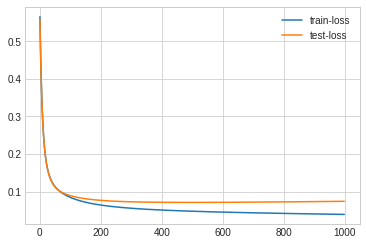

In [143]:
dim = X_train.shape[1]
lr = LogisticReg(dim)
lr.validate_train_against_test(X_train,Y_train,X_test,Y_test,n_iter=1000)

In [144]:
#Save

m = lr.get_model()
m.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.8096, -0.4185, -0.9456, -0.7504, -0.7827,  0.4355, -1.1370, -0.9773,
                        0.4297,  1.5219, -1.3936,  0.4858, -1.0559, -1.3203, -0.8548,  1.7494,
                       -0.3237, -0.4406,  0.3115,  1.8323, -1.0330, -2.0334, -1.1008, -1.1487,
                       -0.5913, -0.0329, -1.1703, -0.9436, -1.2606, -2.1745]])),
             ('0.bias', tensor([-0.0341]))])

In [145]:
torch.save(m.state_dict(),'torch_logistic_reg.pt')
!ls

sample_data  torch_logistic_reg.pt


In [146]:
''' m2 = torch.nn.Sequential(
    torch.nn.Linear(dim,1),
    torch.nn.Sigmoid()
) '''

#m2.load_state_dict(torch.load('torch_logistic_reg.pt'))